# Polynomial Regression

In [1]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# random.rand generate random numbers between 0 to 1
m = 300
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X*X + X + 2 + np.random.randn(m, 1)

<AxesSubplot:xlabel='X', ylabel='y'>

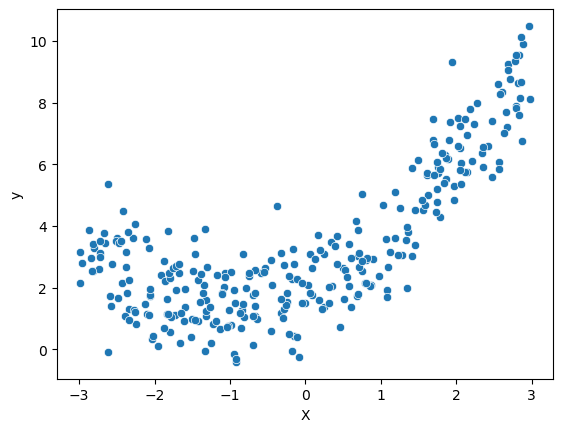

In [3]:
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
sns.scatterplot(x='X', y='y', data=df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1), df['y'], test_size=0.30, random_state=101)

In [6]:
# combine the X, y back to a single dataframe for convenience purpose
df_train = X_train.copy()
df_train['y'] = y_train

In [7]:
df_train.head()

,X,y
34,2.794304,7.904561
1,-1.326911,-0.052439
133,-0.555064,2.511744
283,-1.601501,1.966765
279,1.743803,6.067862


***Now, let's focus on building the model using the training dataset (ie in-sample dataset)***

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_lin_pred = lin_model.predict(X_train)
df_train['y_lin_pred'] = y_lin_pred
print(lin_model.intercept_)
print(lin_model.coef_)

3.54377496072232
[1.02854779]


<AxesSubplot:xlabel='X', ylabel='y'>

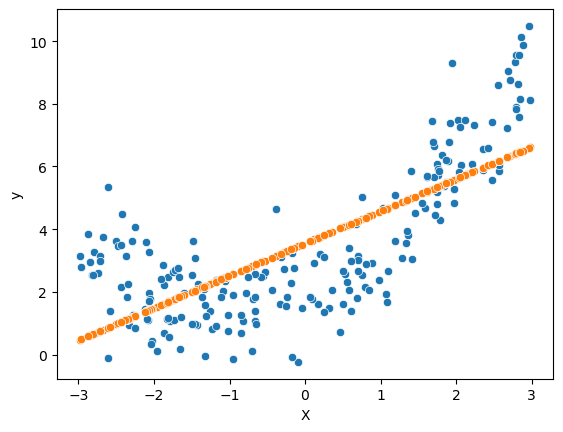

In [10]:
# checking in-sample performance
sns.scatterplot(x='X', y='y', data=df_train)
sns.scatterplot(x='X', y='y_lin_pred', data=df_train)

## Clearly a straight line will never fit the graph properly

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [13]:
poly_features

PolynomialFeatures(include_bias=False)

In [14]:
X_poly_train = poly_features.fit_transform(X_train)
X_poly_train[0]

array([2.79430421, 7.80813604])

In [15]:
math.pow(2.7943, 2)

7.808112489999999

***X_poly now contains X as well as X^2***

***Now we can fit a model of y vs X and X^2***

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

model = LinearRegression()
model.fit(X_poly_train, y_train)
print(model.intercept_)
print(model.coef_)

1.9221426852764172
[1.09696684 0.52701275]


# That is we predict  y = 0.527 * X^2 + 1.096* X + 1.922

# while the actual is y = 0.5 * X^2 + 1.0 * X + 2.0 + Gaussian noise

In [16]:
X_poly_train = poly_features.fit_transform(X_train)
y_pred = model.predict(X_poly_train)
df_train['y_pred'] = y_pred
df_train.head()

,X,y,y_lin_pred,y_pred
34,0.469403,1.984217,4.096446,2.553185
1,-1.987963,1.222972,1.512907,1.824166
133,-0.379120,2.746340,3.204355,1.582009
283,1.832583,5.688060,5.529617,5.702325
279,2.358029,6.983290,6.082042,7.439173


<AxesSubplot:xlabel='X', ylabel='y_pred'>

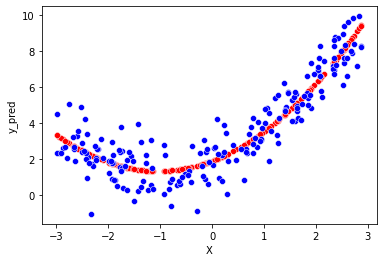

In [17]:
sns.scatterplot(x='X', y='y_pred', data=df_train, color='red')
sns.scatterplot(x='X', y='y', data=df_train, color='blue')

## You can fit a higher degree polynomial

In [18]:
poly20 = PolynomialFeatures(degree=20, include_bias=True)
X_poly20_train = poly20.fit_transform(X_train)
model20 = LinearRegression()
model20.fit(X_poly20_train, y_train)

y_pred20 = model20.predict(X_poly20_train)
df_train['y_pred20'] = y_pred20
df_train.head()

,X,y,y_lin_pred,y_pred,y_pred20
34,0.469403,1.984217,4.096446,2.553185,2.286032
1,-1.987963,1.222972,1.512907,1.824166,1.877448
133,-0.379120,2.746340,3.204355,1.582009,1.199964
283,1.832583,5.688060,5.529617,5.702325,5.651655
279,2.358029,6.983290,6.082042,7.439173,7.691202


In [19]:
print('Root Mean Squared Error with 1-degree polynomial:', np.sqrt(metrics.mean_squared_error(y_train, y_lin_pred)))
print('Root Mean Squared Error with 2-degree polynomial:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Root Mean Squared Error with 20-degree polynomial ', np.sqrt(metrics.mean_squared_error(y_train, y_pred20)))

Root Mean Squared Error with 1-degree polynomial: 1.6413746846402715
Root Mean Squared Error with 2-degree polynomial: 0.9627891030425979
Root Mean Squared Error with 20-degree polynomial  0.9188347013287308


<AxesSubplot:xlabel='X', ylabel='y'>

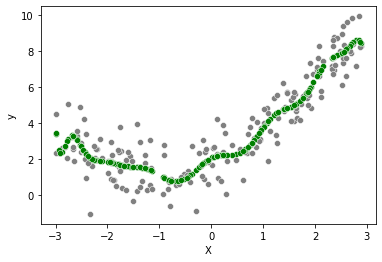

In [20]:
sns.scatterplot(x='X', y='y', data=df_train, color='gray')
sns.scatterplot(x='X', y='y_pred20', data=df_train, color='green')

<AxesSubplot:xlabel='X', ylabel='y'>

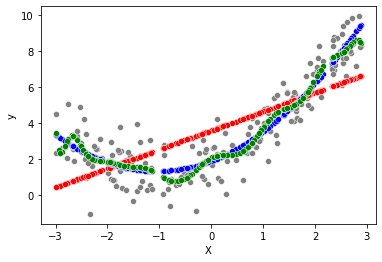

In [21]:
sns.scatterplot(x='X', y='y', data=df_train, color='gray')
sns.scatterplot(x='X', y='y_lin_pred', data=df_train, color='red')
sns.scatterplot(x='X', y='y_pred', data=df_train, color='blue')
sns.scatterplot(x='X', y='y_pred20', data=df_train, color='green')

### Green line has LOWEST root mean square error than the Red or Blue Line for in-sample data

### HOWEVER, Green line may be OVERFITTING while RED line UNDERFIT

### We can check the 3 models performance on the out-of-sample dataset to see which model perform the best

In [23]:
# combine X_test and y_test into a single dataframe for convenience purpose
df_test = X_test.copy()
df_test['y'] = y_test

# Apply linear model to testing dataset
y_lin_pred = lin_model.predict(X_test)
df_test['y_lin_pred'] = y_lin_pred

# Apply degree-2 model
X_poly_test = poly_features.fit_transform(X_test)
y_pred = model.predict(X_poly_test)
df_test['y_pred'] = y_pred

# Apply degree-20 model
X_poly20_test = poly20.fit_transform(X_test)
y_pred20 = model20.predict(X_poly20_test)
df_test['y_pred20'] = y_pred20

print('Root Mean Squared Error with 1-degree polynomial:', np.sqrt(metrics.mean_squared_error(y_test, y_lin_pred)))
print('Root Mean Squared Error with 2-degree polynomial:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error with 20-degree polynomial ', np.sqrt(metrics.mean_squared_error(y_test, y_pred20)))

Root Mean Squared Error with 1-degree polynomial: 1.8539354495711866
Root Mean Squared Error with 2-degree polynomial: 1.0454652524529546
Root Mean Squared Error with 20-degree polynomial  1.2373277319204308


### The Green model indeed under-perform than the Blue model for out-of-sample data !!!

<AxesSubplot:xlabel='X', ylabel='y'>

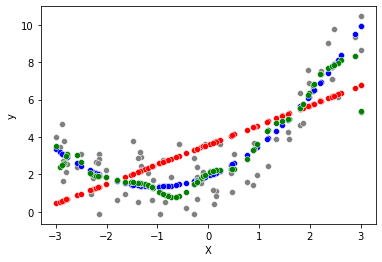

In [24]:
sns.scatterplot(x='X', y='y', data=df_test, color='gray')
sns.scatterplot(x='X', y='y_lin_pred', data=df_test, color='red')
sns.scatterplot(x='X', y='y_pred', data=df_test, color='blue')
sns.scatterplot(x='X', y='y_pred20', data=df_test, color='green')